<a href="https://colab.research.google.com/github/elisabm/arima_model/blob/main/Arima.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Modelos ARIMA**

El modelo Arima es una metodología que se basa en modelos dinámicos y utiliza datos de series temporales. Es un modelo lineal que correlaciona los retrasos, errores y estacionariedad pasados ​​de una serie para hacer una teoría sobre las propiedades estadísticas subyacentes de los datos. Utiliza todaesa información para predecir valores futuros.

Para este proyecto voy a utilizar una base de datos de la criptomoneda EOS y puede ser encontrada en el siguiente enlace: https://www.kaggle.com/sudalairajkumar/cryptocurrencypricehistory.

##**Importar librerías**

In [1]:
import warnings

warnings.filterwarnings('ignore')

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import statsmodels.api as sm
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.arima_model import ARIMA
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

##**Leer conjunto de datos**

La base de datos contiene información sobre el precio de la criptomoneda EOS y Dash, datos diarios entre el 2017 y el 2021 con la siguiente información:

 

*   Open: precio de apertura
*   High: máximo precio tranzado 
*   Low: mínimo precio tranzado
*   Close: precio de cierre 
*   Volume: Dinero tranzado
*   Market Cap: Capital de la criptomoneda en dolares.

In [2]:
url = 'https://raw.githubusercontent.com/elisabm/arima_model/main/coin_EOS.csv'

df = pd.read_csv(url,parse_dates=['Date'])

df = df.set_index('Date')

df.sort_index(inplace=True)

In [3]:
df.head(10)

,SNo,Name,Symbol,High,Low,Open,Close,Volume,Marketcap
Date,,,,,,,,,
2017-07-02 23:59:59,1,EOS,EOS,2.87751,0.822648,0.996521,2.71005,320452000.0,0.000000e+00
2017-07-03 23:59:59,2,EOS,EOS,5.39597,2.632310,2.717390,4.08664,414950016.0,6.549307e+08
2017-07-04 23:59:59,3,EOS,EOS,4.19124,2.933450,4.098010,3.37200,218559008.0,5.501552e+08
2017-07-05 23:59:59,4,EOS,EOS,3.52350,2.730130,3.356000,3.00323,124339000.0,5.006264e+08
2017-07-06 23:59:59,5,EOS,EOS,3.86747,3.007830,3.014260,3.36133,177463008.0,5.683615e+08
2017-07-07 23:59:59,6,EOS,EOS,3.35117,2.713240,3.351170,2.80111,96596496.0,4.811395e+08
2017-07-08 23:59:59,7,EOS,EOS,2.89696,2.085130,2.824680,2.58690,151162000.0,4.893975e+08
2017-07-09 23:59:59,8,EOS,EOS,2.69045,2.193780,2.600430,2.29223,87525104.0,4.726832e+08
2017-07-10 23:59:59,9,EOS,EOS,2.38841,1.722730,2.253080,1.83264,79608800.0,3.819511e+08


In [4]:
df.tail(10)

,SNo,Name,Symbol,High,Low,Open,Close,Volume,Marketcap
Date,,,,,,,,,
2021-06-27 23:59:59,1457,EOS,EOS,3.770769,3.493105,3.572775,3.766423,7.276022e+08,3.595820e+09
2021-06-28 23:59:59,1458,EOS,EOS,3.927719,3.690546,3.773448,3.840925,8.786024e+08,3.667056e+09
2021-06-29 23:59:59,1459,EOS,EOS,4.285907,3.841633,3.847888,4.109534,1.346222e+09,3.923621e+09
2021-06-30 23:59:59,1460,EOS,EOS,4.294250,3.842333,4.125379,4.135842,1.240186e+09,3.948856e+09
2021-07-01 23:59:59,1461,EOS,EOS,4.201095,3.859985,4.136350,3.938224,1.034399e+09,3.760284e+09
2021-07-02 23:59:59,1462,EOS,EOS,4.000508,3.751986,3.930561,3.934325,1.014258e+09,3.756672e+09
2021-07-03 23:59:59,1463,EOS,EOS,4.060837,3.859586,3.926595,4.046421,7.302703e+08,3.863820e+09
2021-07-04 23:59:59,1464,EOS,EOS,4.181861,3.952532,4.048645,4.059930,8.086025e+08,3.876834e+09
2021-07-05 23:59:59,1465,EOS,EOS,4.061888,3.773130,4.061888,3.819266,8.004033e+08,3.647131e+09


##**Ver los datos originales**

Primero vemos los datos cuando el día abrió. A continuación hago la prueba de Dickey-Fuller para probar la estacionalidad.

In [13]:
df['Open'].head(10)

Date
2017-07-02 23:59:59    0.822648
2017-07-03 23:59:59    2.632310
2017-07-04 23:59:59    2.933450
2017-07-05 23:59:59    2.730130
2017-07-06 23:59:59    3.007830
2017-07-07 23:59:59    2.713240
2017-07-08 23:59:59    2.085130
2017-07-09 23:59:59    2.193780
2017-07-10 23:59:59    1.722730
2017-07-11 23:59:59    1.419030
Name: Low, dtype: float64

Text(0.5, 1.0, 'EOS')

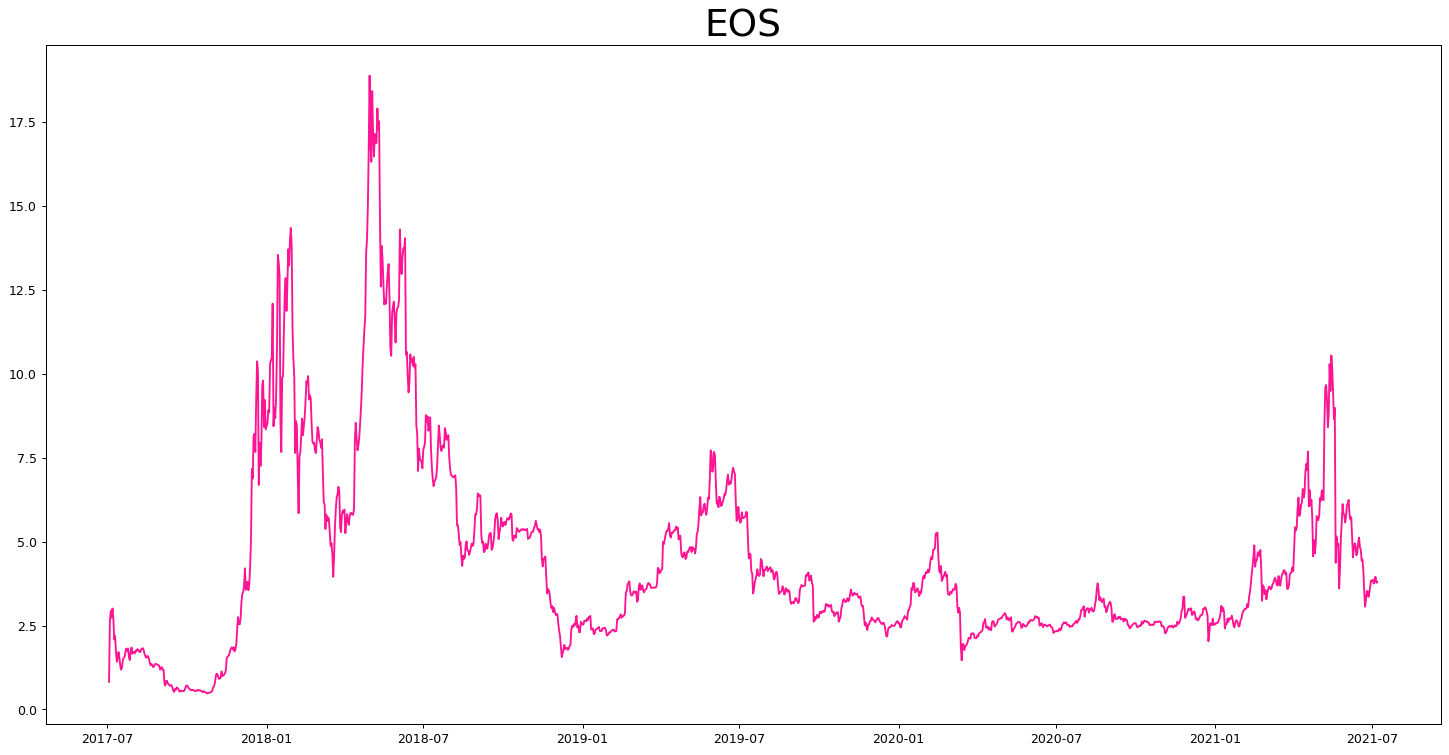

In [14]:
plt.figure(figsize = (20,10))
plt.plot(df["Open"], color = "deeppink")
plt.title("EOS",fontsize = 30)

In [15]:
adf_result = adfuller(df["Open"].dropna())
print("ADF Staticts: %f" % adf_result[0])
print("P-Value: %f" % adf_result[1])

ADF Staticts: -2.947746
P-Value: 0.040071


Debido a que el P-Value es menor que 0.05 nuestra serie es estacionaria. Si fuera mayor a 0.05 entonces tendría que diferenciar. 

##**Identificamos el orden del término AR(p)**

p sera fijada como 1 y q igual a 2


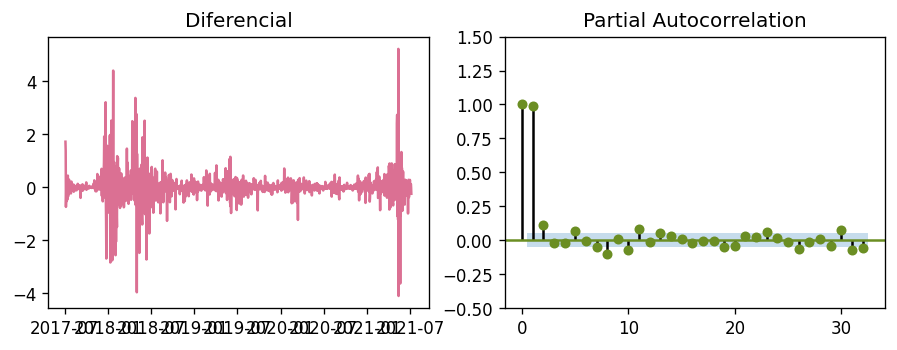

In [17]:
plt.rcParams.update({"figure.figsize" : (9,3), "figure.dpi":120})
fig, axes = plt.subplots(1,2, sharex = False)
axes[0].plot(df["Open"], color = "palevioletred");axes[0].set_title("Diferencial")
axes[1].set(ylim=(-0.5,1.5))
plot_pacf(df["Open"].dropna(), ax = axes[1], color = "olivedrab")
plt.show()

##**Construcción del modelo**
La estructura de un ARIMA se representa como una tupla (1,0,2) el primer elemento es AR (p), el segundo elemento corresponde al número de diferencias para conseguir estacionalidad y el tercero a la cantidad de periodos involucrados en MA (q),.

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)


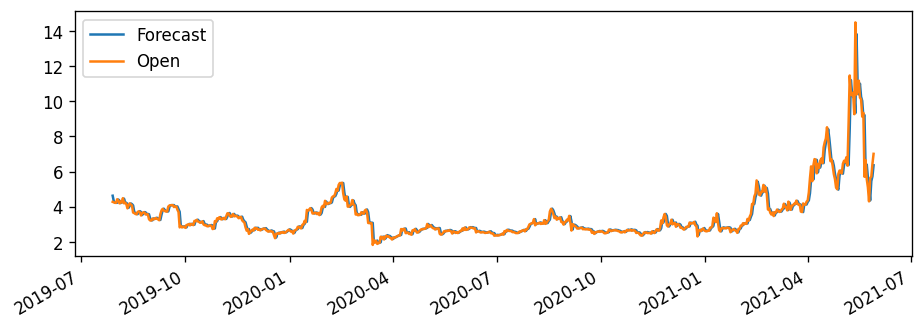

In [19]:

model = ARIMA(df['Open'], order=(1,0,2))
model_train = model.fit() 

fig1 = model_train.plot_predict(start='2019-07-28', end='2021-05-28')

plt.legend(['Forecast','Open'])

fig1.show()

In [ ]:
print(model_train.summary())

                             ARIMA Model Results                              
Dep. Variable:                 D.Open   No. Observations:                 1465
Model:                 ARIMA(1, 1, 1)   Log Likelihood               -1105.463
Method:                       css-mle   S.D. of innovations              0.515
Date:                Fri, 02 Dec 2022   AIC                           2218.925
Time:                        03:35:29   BIC                           2240.084
Sample:                    07-03-2017   HQIC                          2226.817
                         - 07-06-2021                                         
                   coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------
const            0.0019      0.012      0.150      0.881      -0.022       0.026
ar.L1.D.Open    -0.2581      0.174     -1.487      0.137      -0.598       0.082
ma.L1.D.Open     0.1553      0.177      0.87

buscamos un ruido blanco con la siguiente función. Y como vemos no hay ruido blanco debido a que el p-value es menor que 0.05.

In [ ]:
sm.stats.acorr_ljungbox(model_train.resid,lags=[20],return_df=True)

,lb_stat,lb_pvalue
20,53.231895,0.000075


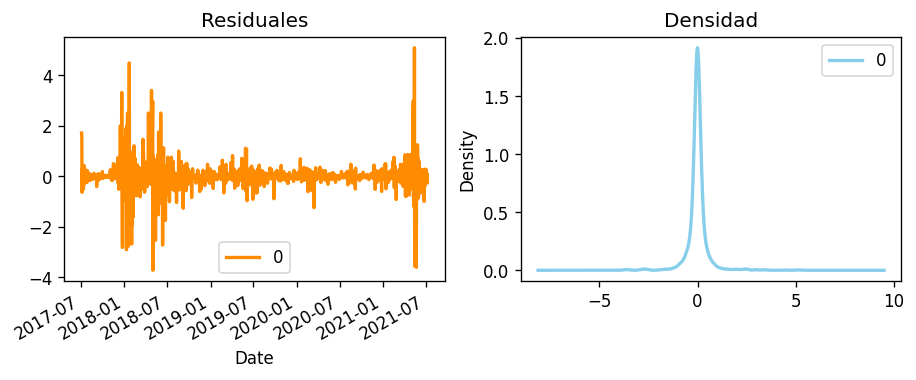

In [ ]:
residuals = pd.DataFrame(model_train.resid)
fig, ax = plt.subplots(1,2)
residuals.plot(title = "Residuales", ax = ax[0], color = "darkorange", lw=2)
residuals.plot(kind = "kde", title = "Densidad", ax = ax[1],color = "skyblue",lw = 2)
plt.show()